## ch04-05 막대그래프

막대그래프는 수량을 막대의 길이로 나타낸 그래프이다. 

### 막대그래프 작성하기  

막대 그래프는 Axes.bar()메서드를 사용해서 그린다 다음 코드는 bar()의 제1, 제2인수에 각각 X값과 Y값을 부여한다. 데이터로서 리스형, 오브젝트를 이용할 수 있다.

In [1]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)

x = [1, 2]
y = [1, 3]

ax.bar(x, y)
plt.show()

<Figure size 640x480 with 1 Axes>

### 눈금 레이블을 붙일 경우

다음 코드처럼 X값을 부여해서 인수 tick_label에 눈금레이블을 설정해서 작성한다. 

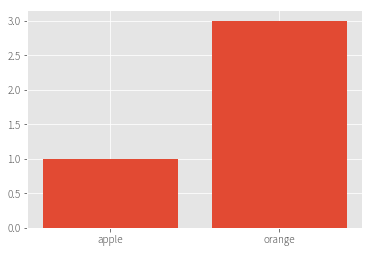

In [2]:
# 횡축의 눈금에 레이블 설정
fig = plt.figure()
ax = fig.add_subplot(111)

labels=['apple', 'orange']
ax.bar(x, y, tick_label=labels)

plt.show()


레이블은 리스트나 튜플로 부여한다. 다음 코드에서는 리스트 labels을 레이블로서 부여하고 있다. 그린 후에 눈금 레이블을 설정하는 방법도 있다. 다음 코드는 Axes.set_xticks()메서드로 X축 눈금을 설정하고 Axes.set_xticklabels()메서드로 눈금 레이블을 설정한다.

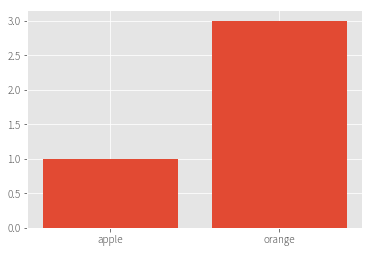

In [3]:
# 그리기
fig = plt.figure()
ax = fig.add_subplot(111)

ax.bar(x, y)

# X축의 축눈금과 축눈금 레이블
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()

### 수평막대그래프를 작성하는 경우

수평 막대그래프는 Axes.barh() 메서드를 이용해서 그린다. 메서드의 인수는 기본적으로 bar()와 같다. 

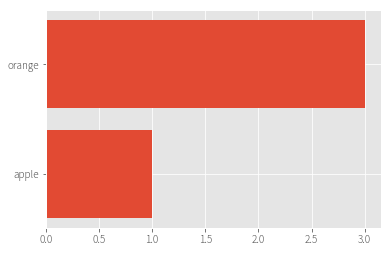

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.barh(x, y, tick_label=labels)

plt.show()

### 막대그래프 활용하기

실제 데이터를 이용해서 그래프를 작성한다. 데이터는 anime_master.csv 파일을 이용한다. 


막대그래프는 수량의 대소를 시각화 할 때 적당하다. 여기에서는 작품의 배급 종별마다 멤버수의 합계 값을 추출해서 막대그래프를 그란다. 
Matplotlib은 pandas의 DataFrame이나 Series를 이용해서 그래프를 그릴 수 있다. 다음 코드는 X값에 배급 종별, Y값에 배급 종별마다의 합계 멤버수를 부여해서 그린다. 

x에 대해서는 len()함수로 DataFrame의 데이터 수를 계수하고 range()함수로 그 범위의 정수 열을 생성한다. 

또한 X축 레이블에는 Serise의 인덱스를 부여한다. 

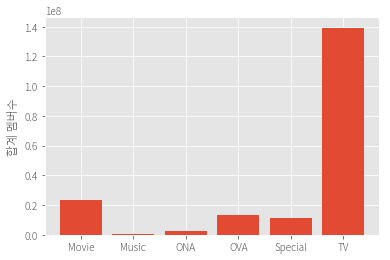

In [5]:
import pandas as pd

anime_master_csv = './anime/anime_master.csv'

df = pd.read_csv(anime_master_csv)

fig = plt.figure()

ax = fig.add_subplot(111)

y = df.groupby('type').sum()['members']

x = range(len(y))

xlabels = y.index
ax.bar(x, y, tick_label = xlabels)
ax.set_ylabel('합계 멤버수')

plt.show()

### 여러가지 그룹에 대한 막대그래프 작성하기

여러 그룹의 막대그래프를 그릴 때에는 공부가 필요하다. 다음 코드 처럼 여러번 bar()를 실행하면 최초에 그려진 오브젝트가 뒤에 그려진 오브젝트에 의해 덮여씌어진다. 

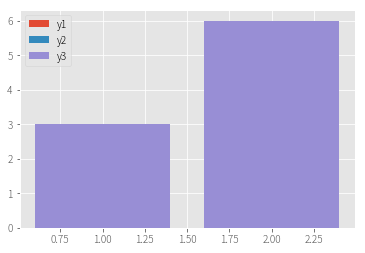

In [6]:
# 여러 그룹 막대그래프 그리기(실패 사례)
import numpy as np

# 데이터 세트 작성

x = [1, 2]
y1, y2, y3 = [1,2], [2, 4], [3, 6]

# 복수 그룹의 막대 그래프
fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x, y1, label='y1')
ax.bar(x, y2, label='y2')
ax.bar(x, y3, label='y3')


ax.legend()

plt.show()

위의 코드는 같은 X값을 가진 오브젝트가 겹쳐진다. 이것을 피하기 위해서는 다음 코드처럼 X값을 막대의 가로 폭 만큼 비켜서 그릴 필요가 있다. 다음 코드는 막대그래프의 가로 폭을 0.2로 설정하고 X값을 0.2 만큼씩 비켜서 그리고 있다. 

[1 2]


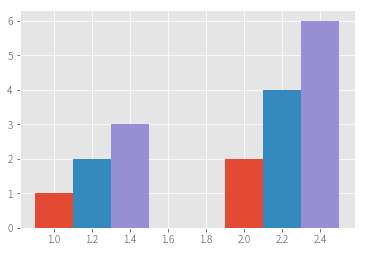

In [12]:
# 복수 그룹의 막대 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(111)

w = 0.2
ax.bar(x, y1, width=w, label='y1')
ax.bar(np.array(x) + w, y2, width=w, label='y1')
ax.bar(np.array(x) + w * 2, y3, width=w, label='y2')

print(np.array(x))

### 여러 그룹의 막대그래프 확용하기

실제의 데이터를 이용해서 그래프를 그린다. 데이터는 anime_genre_top10_pivoted.csv 파일을 이용한다. 

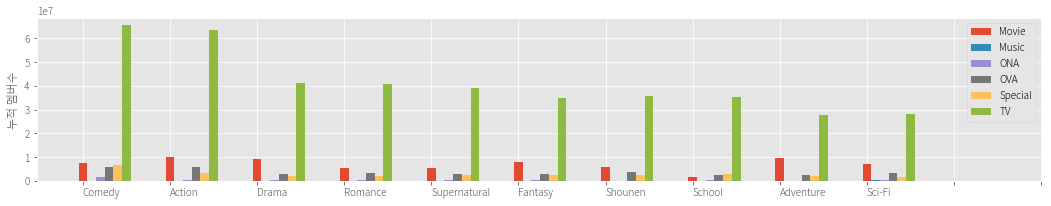

In [20]:
anime_genre_top10_pivoted_csv = './anime/anime_genre_top10_pivoted.csv'
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col='genre')

fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag)+2)))    
ax.set_xticklabels(dfag.index, ha = 'left')
ax.set_ylabel('누적 멤버수')
ax.legend()

plt.show()

위의 코드는 Music 이나 ONA 값이 상대적으로 작기 때문에 눈으로 확인하는 것이 어렵다. 이 같은 경우에 로그축을 이용하면 가독성이 좋아진다. Y축을 로그축에 설정하는 경우에는 다음 코드 처럼 set_yscale() 메서드에 log를 지정한다. 

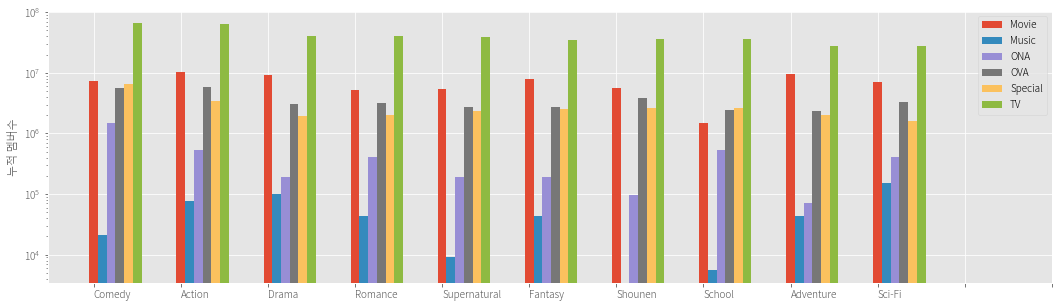

In [27]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)

wt = np.array(range(len(dfag)))
# print(wt)
w = 0.1

for i in dfag.columns:
    ax.bar(wt, dfag[i], width = w, label = i)
    wt = wt + w
    
ax.set_xticks(np.array(range(len(dfag)+2)))
ax.set_xticklabels(dfag.index, ha='left')
ax.set_ylabel('누적 멤버수')
ax.set_yscale('log')
ax.legend()

plt.show()

### 누적 막대그래프 그리기

누적 막대그래프를 그릴 때에도 여러 구릅의 막대그래프와 같이 작성시 요령이 필요하다. 다음은 y1, y2, y3이라는 세 개의 값을 누적한 경우의 그리기 순서를 설명한다. 실제의 그리기 순서는 다음과 같다. 
- 1) y1과 y2와 y3의 합을 그린다. 
- 2) 1)에 y2와 y3의 값을 겹쳐서 그린다. 
- 3) 2)에 y1을 겹쳐서 그린다. 

같은 X값을  부여해서 그리면 뒤에 그린 막대에 겹쳐지기 때문에 수동으로 값으 합계를 내서 합계가 많은 쪽부터 순서대로 그리는 작업을 한다. 

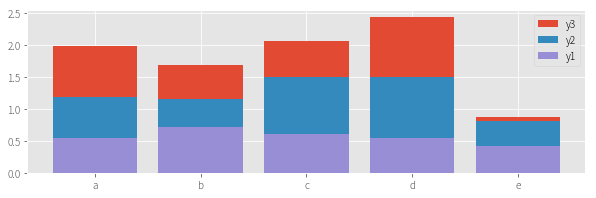

In [36]:
# 데이터 세트 작성
x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape(3, 5)
y1, y2, y3 = y

y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)

# 누적 막대 그래프 그리기
fig = plt.figure(figsize = (10, 3))
ax = fig.add_subplot(111)

ax.bar(x, y3b, label='y3')
ax.bar(x, y2b, label='y2')
ax.bar(x, y1b, label='y1')

labels = ['a', 'b', 'c', 'd', 'e']
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

#### bottom 옵션으로 누적 설정하기
누적 막대그래프 작성시 옵션으로 bottom 옵션이 있다. 하단에 오는 리스트형, 오브젝트를 인수 bottom에 설정하는 것에 의해 누적 표시가 이루어진다. 

아래 코드는 위의 코드와 출력 결과가 같아진다. 하지만, 세 그룹 이사을 누적할 경우 위와 같은 방식으로 처리해야 한다. 두 개 그룹의 누적까지는 bottom 옵션이 유효하지만 그 이상을 누적할 경우에는 위의 방식이 유효화다

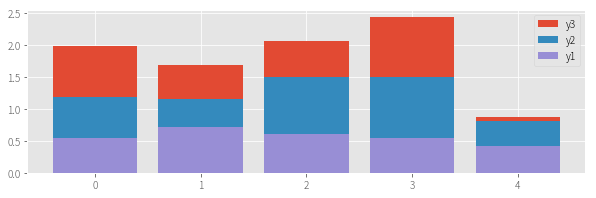

In [38]:
figure = plt.figure(figsize=(10, 3))
ax = figure.add_subplot(111)

ax.bar(x, y3, bottom = y2b, label = 'y3')
ax.bar(x, y2, bottom = y1b, label = 'y2')
ax.bar(x, y1, label = 'y1')
ax.legend()

plt.show()

#### pandas의 plot.bar()메서드에 "stacked=True"을 지정하여 간단히 누적 막대그래프를 그릴 수 있다. 

### 누적 막대그래프 활용하기

실제 데이터를 이용해 그래프를 작성한다. 데이터는 앞에서 이용한 anime_genre_top10_pivoted.csv 파일을 이용한다. 데이터는 dfag에 DataFrame으로 저장되어 있다. 

0 Movie
1 Music
2 ONA
3 OVA
4 Special
5 TV


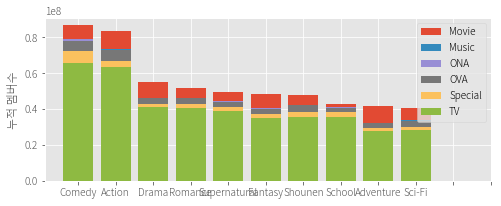

In [47]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)

rows, cols = len(dfag), len(dfag.columns)
x = range(rows)

for i, t in enumerate(dfag.columns):
    # i 열부터 마지막까지의 합을 계산
    print(i, t)
    y = dfag.iloc[:, i : cols].sum(axis=1)
    
    ax.bar(x, y, label=t)
ax.set_xticks(range(rows +2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel('누적 멤버수')
ax.legend()

plt.show()
    